<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Axial_Length_Prediction_ML_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Mounting and Loading dataset from google drive

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Axial length prediction.xlsx')

In [3]:
df.shape

(108, 3)

### Exploring the dataset

In [4]:
# find first 5 rows and columns
df.head()

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79
4,42.0,41.00,21.10


In [5]:
# find last 5 rows and columns
df.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


In [6]:
# find descriptive statistics
df.describe()

,KH,KV,AL
count,108.000000,108.000000,108.000000
mean,44.756481,44.129167,22.704167
std,1.551636,1.760219,0.791164
min,41.500000,40.500000,20.300000
25%,43.500000,42.750000,22.305000
50%,44.750000,44.000000,22.775000
75%,46.000000,45.500000,23.222500
max,47.750000,48.500000,24.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KH      108 non-null    float64
 1   KV      108 non-null    float64
 2   AL      108 non-null    float64
dtypes: float64(3)
memory usage: 2.7 KB


In [8]:
df.isnull().sum()

KH    0
KV    0
AL    0
dtype: int64

Text(0.5, 1.0, 'Dataset scatter plot')

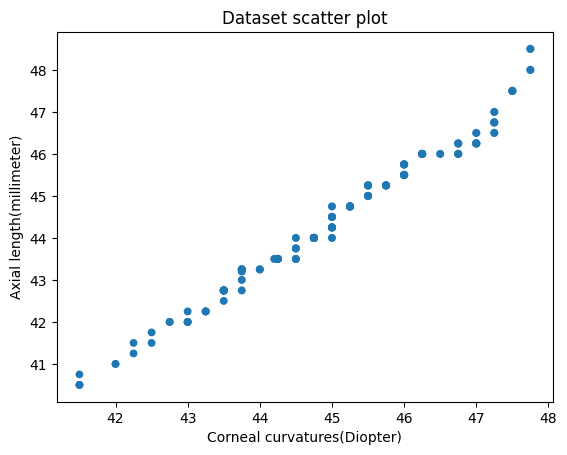

In [9]:
# plotting scatter plot for visualising data distribution of corneal curvatures before outliers removal
plt.scatter(df.KH, df.KV, df.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

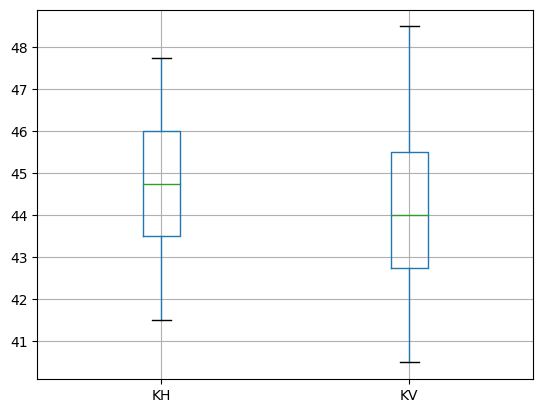

In [10]:
# creating Box and Whiskers plots for corneal curvatures
df.boxplot(['KH','KV'])

<Axes: >

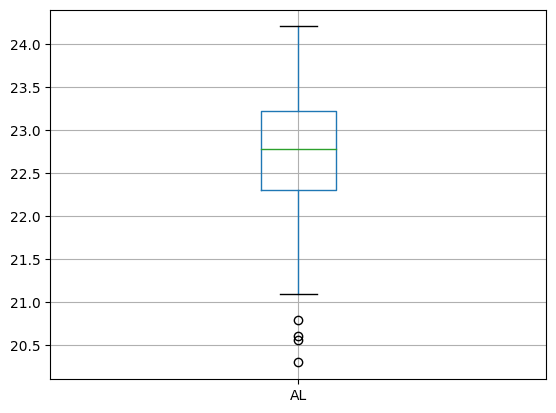

In [11]:
# creating Box and Whiskers plots for axial length
df.boxplot(['AL'])

### Outliers detection and removal

In [53]:
Q1 = df.AL.quantile(0.25)
Q2 = df.AL.quantile(0.50)
Q3 = df.AL.quantile(0.75)
Q1, Q2,Q3

(22.305, 22.775, 23.2225)

In [54]:
IQR = Q3-Q1
IQR

0.9175000000000004

In [55]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(20.92875, 24.598750000000003)

In [56]:
df[(df.AL<lower_limit)|(df.AL>upper_limit)]

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79


In [61]:
df_no_outliers = df[(df.AL>lower_limit)&(df.AL<upper_limit)]
df_no_outliers

,KH,KV,AL
4,42.00,41.00,21.10
5,42.00,41.00,21.25
6,42.25,41.25,21.38
7,42.25,41.50,21.46
8,42.50,41.50,21.50
...,...,...,...
103,47.25,47.00,23.90
104,47.50,47.50,24.00
105,47.50,47.50,24.04
106,47.75,48.00,24.08


In [58]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


Text(0.5, 1.0, 'Dataset scatter plot')

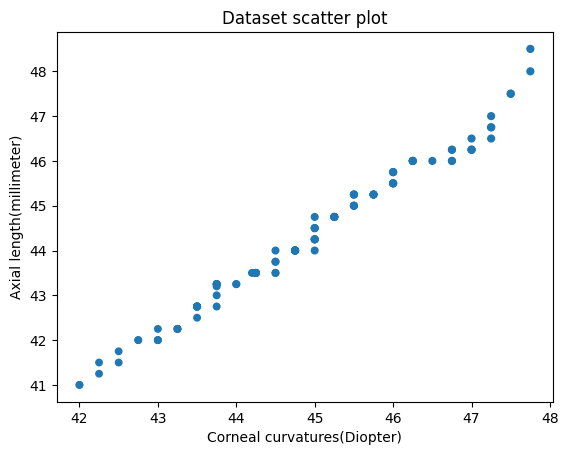

In [59]:
# plotting scatter plot for visualising data distribution of corneal curvatures after outliers removal
plt.scatter(df_no_outliers.KH, df_no_outliers.KV, df_no_outliers.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

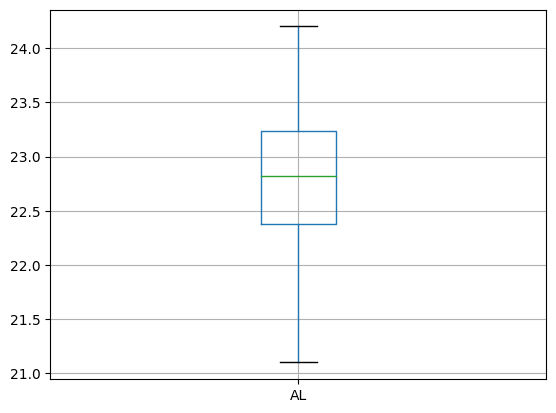

In [60]:
df_no_outliers.boxplot('AL')

In [20]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


### Heat map construction for correlation matrix

<Axes: >

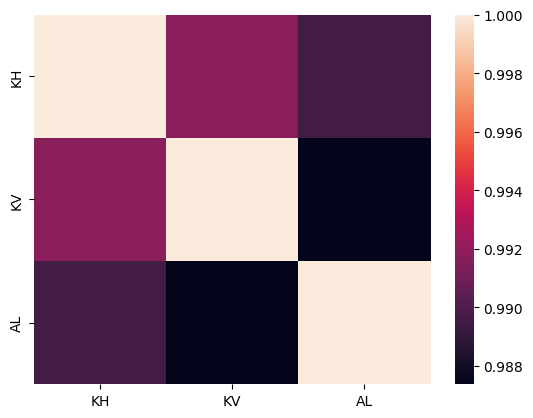

In [21]:
# constucting heat map for correlation matrix
sns.heatmap(df_no_outliers.corr())

In [22]:
df_no_outliers.corr()

,KH,KV,AL
KH,1.000000,0.991751,0.989643
KV,0.991751,1.000000,0.987376
AL,0.989643,0.987376,1.000000


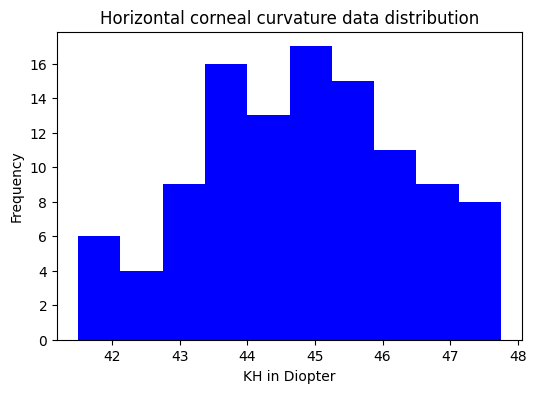

In [23]:
plt.figure(figsize = (6, 4))
x = df.KH
plt.hist(x, bins = 10, color = "blue")
plt.title("Horizontal corneal curvature data distribution")
plt.xlabel("KH in Diopter")
plt.ylabel("Frequency")
plt.show()

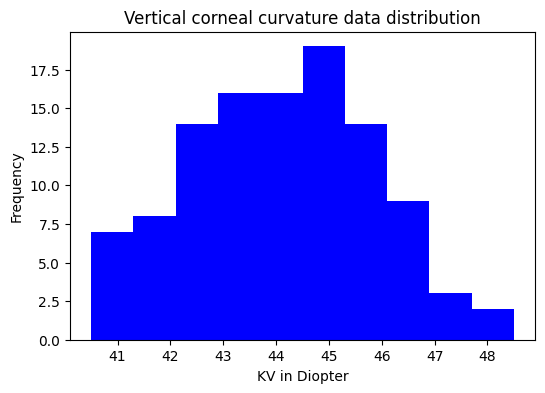

In [24]:
plt.figure(figsize = (6, 4))
x = df.KV
plt.hist(x, bins = 10, color = "blue")
plt.title("Vertical corneal curvature data distribution")
plt.xlabel("KV in Diopter")
plt.ylabel("Frequency")
plt.show()


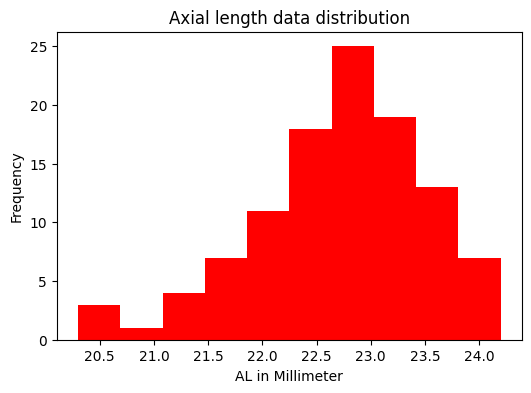

In [25]:
plt.figure(figsize = (6, 4))
x = df.AL
plt.hist(x, bins = 10, color = "red")
plt.title("Axial length data distribution")
plt.xlabel("AL in Millimeter")
plt.ylabel("Frequency")
plt.show()

### Defining X and y as independant and dependant variable

In [26]:
X = df_no_outliers.drop(['AL'], axis=1).values
y = df_no_outliers['AL'].values

In [27]:
X=df.drop(['AL'], axis=1).values
y=df['AL'].values

### Spliting the dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_true = train_test_split(X,y,test_size=0.3, random_state=42)

### Fitting the prepared and split dataset for training by Linear reegression, Support vector machine algorithm, Decision tree algorithm and Random forest algorithm

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [30]:
from os import supports_bytes_environ
from sklearn.svm import SVR
supportv_model = SVR()
supportv_model.fit(X_train, y_train)

SVR()

In [31]:
from sklearn.tree import DecisionTreeRegressor
decisiont_model = DecisionTreeRegressor()
decisiont_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
from sklearn.ensemble import RandomForestRegressor
randomf_model = RandomForestRegressor()
randomf_model.fit(X_train, y_train)

RandomForestRegressor()

### Models prediction on Testing set

In [33]:
# linear regression model predictions on testing set
actual = y_true
predicted = linear_model.predict(X_test)
predicted

array([23.20032952, 21.73392287, 21.34818204, 23.3204035 , 22.84010758,
       22.96018156, 22.2346339 , 22.57444073, 23.68062545, 21.73392287,
       23.3204035 , 23.20032952, 21.10803408, 23.3204035 , 21.94855194,
       22.96018156, 22.7890698 , 23.20032952, 24.23747803, 22.45436675,
       21.82847796, 22.33429277, 22.86562647, 22.09414481, 22.09414481,
       22.23973768, 22.59995962, 23.89525452, 21.85399685, 22.54892184,
       23.46599637, 23.46599637, 21.61384889])

In [34]:
# Support vector machine regression model predictions on testing set
actual = y_true
predicted = supportv_model.predict(X_test)
predicted

array([23.15361755, 21.76122051, 21.09340368, 23.2518975 , 22.87006595,
       22.96525776, 22.34627569, 22.61734904, 23.57190311, 21.76122051,
       23.2518975 , 23.15361755, 20.85272245, 23.2518975 , 22.00208894,
       22.96525776, 22.76650209, 23.15361755, 23.9600396 , 22.51333062,
       21.84958957, 22.40870221, 22.91632773, 22.1905749 , 22.1905749 ,
       22.35738514, 22.67035737, 23.69223717, 21.92549312, 22.5641122 ,
       23.41380208, 23.41380208, 21.57544123])

In [35]:
# Decision tree regression model predictions on testing set
actual = y_true
predicted = decisiont_model.predict(X_test)
predicted

array([23.21      , 21.79      , 21.25      , 23.26      , 22.95      ,
       23.00666667, 22.41333333, 22.66      , 23.51      , 21.79      ,
       23.26      , 23.21      , 20.585     , 23.26      , 22.015     ,
       23.00666667, 22.8775    , 23.21      , 24.02      , 22.59      ,
       21.79      , 22.47      , 22.95      , 22.18333333, 22.18333333,
       22.41333333, 22.75125   , 23.76      , 22.015     , 22.62      ,
       23.43      , 23.43      , 21.5       ])

In [36]:
# Random forest regression model predictions on testing set
actual = y_true
predicted = randomf_model.predict(X_test)
predicted

array([23.15828238, 21.70412333, 21.161975  , 23.25262238, 22.93473071,
       23.00291143, 22.4116981 , 22.64754667, 23.53815667, 21.70412333,
       23.25262238, 23.15828238, 20.6167625 , 23.25262238, 21.99668667,
       23.00291143, 22.81214857, 23.15828238, 24.07554667, 22.58934325,
       21.81202   , 22.47179667, 22.96995024, 22.18622236, 22.18622236,
       22.4116981 , 22.70546877, 23.78676738, 21.90226833, 22.62075333,
       23.42359   , 23.42359   , 21.50342   ])

## Evaluate the model for the Accuracy

In [37]:
# accuracy of the linear regression model
from sklearn.metrics import r2_score
predicted = linear_model.predict(X_test)
r2_score(actual, predicted)

0.9514618142177875

In [39]:
# Accuracy of support vector regression model
actual = y_true
predicted = supportv_model.predict(X_test)
r2_score(actual, predicted)

0.9774846109126626

In [40]:
# Accuracy of Decision tree regression model
actual = y_true
predicted = decisiont_model.predict(X_test)
r2_score(actual, predicted)

0.988353821840573

In [41]:
# Accuracy of random forest regression model
actual = y_true
predicted = randomf_model.predict(X_test)
r2_score(actual, predicted)

0.9918181951534061

### Deducing coefficient and intercept for multiple linear regression equation

In [42]:
print(linear_model.coef_), print(linear_model.intercept_)

[0.37822037 0.10207555]
1.2778288750639


(None, None)

In [43]:
from sklearn import metrics
metrics.mean_absolute_error(actual, predicted)

0.04362791257563768

In [44]:
metrics.mean_squared_error(actual, predicted)

0.005352177602752216

In [45]:
np.sqrt(metrics.mean_squared_error(actual, predicted))

0.07315857846317284

### Verifying each model on one example from the original dataset

In [46]:
# Cross validation of linear regression model
linear_model.predict([[47.25,	47.0]])

array([23.94629229])

In [47]:
# Cross validation of support vector machine regression model
supportv_model.predict([[47.25,	47.0]])

array([23.83443495])

In [48]:
# Cross validation of Decision tree regression model
decisiont_model.predict([[47.25,	47.0]])

array([23.9])

In [49]:
# Cross validation of random forest regression model
randomf_model.predict([[47.25,	47.0]])

array([23.877385])

In [50]:
df_no_outliers.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted axial length')

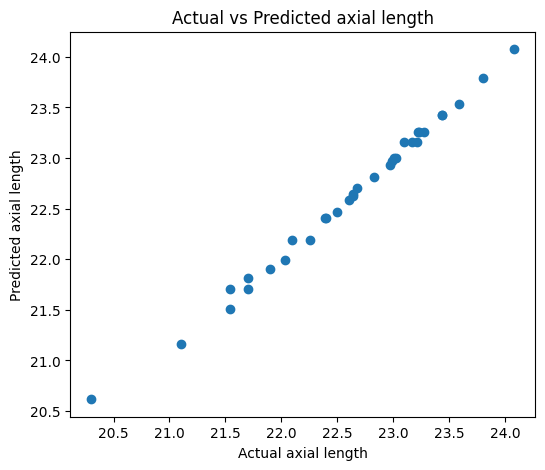

In [51]:
plt.figure(figsize=(6,5))
plt.scatter(actual,predicted)
plt.xlabel('Actual axial length')
plt.ylabel('Predicted axial length')
plt.title('Actual vs Predicted axial length')

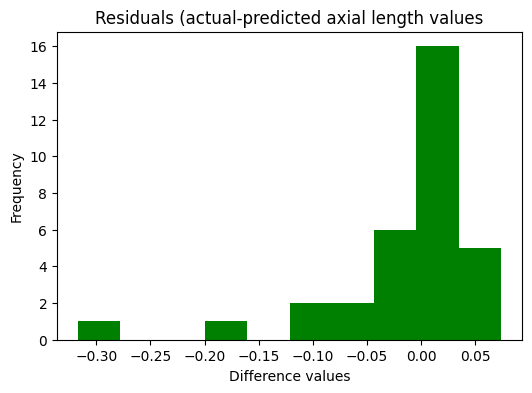

In [52]:
plt.figure(figsize = (6, 4))
plt.hist(actual-predicted, bins=10, color = "green")
plt.title("Residuals (actual-predicted axial length values")
plt.xlabel("Difference values")
plt.ylabel("Frequency")
plt.show()


### Predictive model equation
y=m1X1+m2X3+b

Predicted AL= 0.38*KH+0.10KV+1.28

